# LinkedIn IT Job Market Analysis for Sri Lanka - In-Depth Actionable Insights

**Comprehensive Jupyter Notebook for Deep Dive Analysis & Actionable Intelligence**

This Jupyter Notebook provides an EXTREMELY in-depth analysis of the Sri Lankan job market using LinkedIn job posting data. It goes beyond basic metrics to deliver **actionable insights** for a wide range of stakeholders:

*   **Job Seekers:**  Target roles, skill development, location focus, compensation expectations.
*   **Industries & Companies:**  Demand hotspots, talent acquisition strategies, competitive benchmarking, workforce planning.
*   **Students & Educators:**  Curriculum alignment, in-demand skills, career path guidance.
*   **Regional Development Agencies:**  Regional economic strengths, industry specializations, workforce characteristics.
*   **Market Analysts & Policymakers:**  Market trends, sentiment indicators, economic shifts, workforce evolution.

The analysis leverages **interactive visualizations** created with Plotly Express for dynamic exploration and clear communication of findings.  **Deep text analysis** techniques (keyword extraction, sentiment analysis, benefit/requirement categorization) are employed to extract nuanced and valuable information from job descriptions, all without relying on complex Machine Learning models .

---


## 1. Setup: Libraries and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
from io import BytesIO
import plotly.express as px
from nltk.util import ngrams
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [ ]:
# Load the dataset
df = pd.read_csv('/content/linkedin_jobs_lk.csv')
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [ ]:
df.head()

,job_id,title,company,location,experience_level,employment_type,posted_date,job_function,industries,salary,required_skills,description,company_size,company_industry,applicant_count,job_url,sort_method,time_filter
0,4157857769,Civic Centre - Casual Positions,Shire of Broome,"Civic Centre, Northern Province, Sri Lanka",Not Applicable,Full-time,2025-02-18,Other,Government Administration,NaN,NaN,Browse JobsApplication DisclosurePrivacySign i...,NaN,NaN,NaN,https://lk.linkedin.com/jobs/view/civic-centre...,relevant,24h
1,4014123561,Accountant,Oceans,Sri Lanka,Mid-Senior level,Contract,2024-09-03,Accounting/Auditing,Outsourcing and Offshoring Consulting,NaN,NaN,Work with U.S. Startups and C-Suite Executives...,NaN,NaN,NaN,https://lk.linkedin.com/jobs/view/accountant-a...,relevant,24h
2,4182292830,Executive - Human Resources,Perfetti Van Melle,"Rajagiriya, Western Province, Sri Lanka",Mid-Senior level,Full-time,2025-03-15,Human Resources,Motor Vehicle Manufacturing,NaN,NaN,We are one of the world’s largest manufacturer...,NaN,NaN,NaN,https://lk.linkedin.com/jobs/view/executive-hu...,relevant,24h
3,4169977180,Accountant - 0001,NativeWay,"Colombo, Western Province, Sri Lanka",Mid-Senior level,Full-time,2025-02-27,Accounting/Auditing and Finance,Construction,NaN,NaN,"AccountantLocation:Colombo, Sri LankaCompany O...",NaN,NaN,NaN,https://lk.linkedin.com/jobs/view/accountant-0...,relevant,24h
4,4184870059,Intern - Marketing,Unilever,"Colombo, Western Province, Sri Lanka",Internship,Full-time,2025-03-14,"General Business, Strategy/Planning, and Marke...","Manufacturing, Food and Beverage Manufacturing...",NaN,NaN,Are You Passionate for a career in Marketing ?...,NaN,NaN,NaN,https://lk.linkedin.com/jobs/view/intern-marke...,relevant,24h


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_id            9532 non-null   int64  
 1   title             9532 non-null   object 
 2   company           9532 non-null   object 
 3   location          9532 non-null   object 
 4   experience_level  9527 non-null   object 
 5   employment_type   9527 non-null   object 
 6   posted_date       9532 non-null   object 
 7   job_function      9156 non-null   object 
 8   industries        9503 non-null   object 
 9   salary            0 non-null      float64
 10  required_skills   0 non-null      float64
 11  description       9527 non-null   object 
 12  company_size      0 non-null      float64
 13  company_industry  0 non-null      float64
 14  applicant_count   0 non-null      float64
 15  job_url           9532 non-null   object 
 16  sort_method       9532 non-null   object 


## 2. Data Cleaning and Preprocessing

In [ ]:
# Drop Unnecessary Columns (Optimized for Sri Lanka Job Market Focus)
columns_to_drop = ['applicant_count', 'company_industry', 'required_skills', 'salary', 'job_url', 'sort_method', 'time_filter','company_size']
df = df.drop(columns=columns_to_drop, errors='ignore')
print("Unnecessary Columns Dropped!")

Unnecessary Columns Dropped!


In [ ]:
# Remove Duplicate Rows (Ensuring Unique Job Posting Analysis)
df = df.drop_duplicates()
df = df.drop_duplicates(subset=['job_id', 'description'], keep='first')
print("Duplicate Rows Removed!")

Duplicate Rows Removed!


In [ ]:
# Check for duplicates based on 'job_id'
duplicates = df.duplicated(subset=['job_id'], keep='first')

# Display the number of duplicates
num_duplicates = duplicates.sum()
print(f"Number of duplicate job IDs: {num_duplicates}")

# Remove duplicates, keeping the first occurrence
df = df.drop_duplicates(subset=['job_id'], keep='first')

Number of duplicate job IDs: 20


In [ ]:
# Define IT job categories

categorize_it_job = {
'software_development': [
    'software developer', 'software engineer', 'programmer', 'coder', 'full stack', 'frontend',
    'backend', 'mobile developer', 'ios developer', 'android developer', 'web developer',
    'javascript developer', 'python developer', 'java developer', 'php developer', 'ruby developer',
    '.net developer', 'c# developer', 'c++ developer', 'scala developer', 'go developer', 'golang',
    'react developer', 'angular developer', 'vue developer', 'node.js developer', 'typescript',
    'flutter developer', 'kotlin developer', 'swift developer', 'rust developer', 'elm developer',
    'clojure developer', 'haskell developer', 'elixir developer', 'erlang developer', 'react native',
    'technical lead', 'lead developer', 'mern stack', 'mean stack', 'laravel developer',
    'wordpress developer', 'shopify developer', 'senior developer', 'junior developer',
    'associate software engineer', 'development team lead', 'spring boot', 'asp.net'
],


'data_science': [
    'data scientist', 'data analyst', 'business intelligence', 'bi developer', 'machine learning',
    'ml engineer', 'ai engineer', 'artificial intelligence', 'nlp', 'natural language processing',
    'computer vision', 'deep learning', 'statistical analyst', 'big data', 'data engineer',
    'data architect', 'etl developer', 'analytics', 'data mining', 'predictive modeling',
    'tableau developer', 'power bi developer', 'data visualization', 'statistician', 'r developer',
    'time series forecasting', 'llm', 'large language model', 'computer vision engineer',
    'research scientist', 'data automation', 'data processing', 'data operations', 'database engineer',
    'risk & data analyst', 'data automation architect', 'fpga engineer', 'neural networks',
    'reinforcement learning', 'researcher - data science', 'lead data scientist','ai engineer', 'machine learning engineer', 'deep learning engineer', 'nlp engineer',
    'computer vision engineer', 'ai research scientist', 'ai developer', 'ml ops',
    'ai product manager', 'ai architect', 'neural network engineer', 'ml infrastructure',
    'ai ethicist', 'conversational ai', 'reinforcement learning', 'generative ai',
    'prompt engineer', 'llm engineer', 'large language model', 'ai designer','database administrator', 'dba', 'database engineer', 'data engineer',
    'sql developer', 'nosql', 'mongodb', 'postgresql', 'mysql', 'oracle dba',
    'sql server', 'database architect', 'database manager', 'etl developer',
    'data warehouse', 'data modeling', 'database optimization', 'data migration',
    'database security', 'database reliability', 'database performance'
],

'cloud_devops': [
    'cloud engineer', 'cloud architect', 'devops engineer', 'site reliability engineer', 'sre',
    'infrastructure engineer', 'aws', 'azure', 'gcp', 'google cloud', 'cloud native', 'kubernetes',
    'docker', 'containerization', 'ci/cd', 'jenkins', 'terraform', 'ansible', 'chef', 'puppet',
    'microservices', 'service mesh', 'cloud migration', 'cloud optimization', 'cloud security',
    'release engineer', 'infrastructure & platform delivery', 'deployment engineer',
    'platform engineer', 'build & deployment', 'cloud optimization', 'cloud administrator',
    'cloud support', 'iaas', 'paas', 'saas', 'gitops', 'argocd', 'helm'
],

'cybersecurity': [
    'security engineer', 'security analyst', 'cybersecurity', 'cyber security', 'information security',
    'infosec', 'penetration tester', 'pen tester', 'ethical hacker', 'security consultant',
    'security architect', 'security administrator', 'security operations', 'soc analyst',
    'threat intelligence', 'vulnerability assessment', 'devsecops', 'security compliance',
    'security auditor', 'cryptography', 'encryption', 'risk management', 'threat modeling',
    'security specialist', 'security operations engineer', 'security analyst', 'soc manager',
    'managed security services', 'security specialist lead', 'it security engineer',
    'pam', 'cyberark'
],

'network_systems': [
    'network engineer', 'network administrator', 'systems administrator', 'sysadmin',
    'systems engineer', 'network architect', 'network security', 'cisco', 'juniper', 'ccna',
    'ccnp', 'ccie', 'voip', 'wan', 'lan', 'virtualization', 'vmware', 'hyper-v',
    'datacenter', 'network support engineer', 'network and firewall engineer', 'noc engineer',
    'system administrator', 'network admin', 'senior network admin', 'engineer - storage',
    'data center administrator', 'it hardware technician'
],

'qa_testing': [
    'quality assurance', 'qa engineer', 'test engineer', 'software tester', 'qa analyst',
    'automation tester', 'manual tester', 'test lead', 'qa lead', 'test manager',
    'quality analyst', 'performance tester', 'test automation', 'selenium', 'appium',
    'quality assurance analyst', 'quality assurance executive', 'quality engineer',
    'quality engineer lead', 'senior quality assurance', 'qa automation engineer',
    'associate qa lead', 'automation testing', 'sdet', 'architect - quality engineering'
],

'it_support': [
    'it support', 'help desk', 'service desk', 'technical support', 'desktop support',
    'it helpdesk', 'it technician', 'support specialist', 'support engineer',
    'it administrator', 'technical support specialist', 'support analyst',
    'service desk engineer', 'level 1 support', 'level 2 support', 'level 3 support',
    'application support', 'l1 support', 'l2 support', 'l3 support', 'l1 engineer',
    'l2 engineer', 'l3 engineer', 'l3/l4 engineer', 'product support engineer',
    'technical support engineer', 'end user support', 'euc support'
],

'project_management': [
    'project manager', 'program manager', 'scrum master', 'agile coach', 'product owner',
    'it project manager', 'technical project manager', 'project coordinator',
    'pmo specialist', 'project management office', 'delivery manager', 'project lead',
    'it program manager', 'technical program manager', 'sprint master', 'project director',
    'associate project manager', 'project management intern', 'senior project manager',
    'senior program manager', 'project engineer', 'software development team lead'
],

'ui_ux_design': [
    'ui designer', 'ux designer', 'ui/ux designer', 'user interface designer',
    'user experience designer', 'interaction designer', 'visual designer',
    'product designer', 'web designer', 'mobile designer', 'ux researcher',
    'ui/ux engineer', 'ux architect', 'ui developer', 'design systems',
    'user research', 'usability testing', 'wireframing', 'prototyping',
    'information architecture', 'associate ui/ux designer', 'ui/ux intern',
    'senior ui ux designer', 'graphics designer', 'creative designer'
],

'technical_writing': [
    'technical writer', 'documentation specialist', 'api documentation',
    'knowledge base writer', 'information developer', 'content developer',
    'documentation engineer', 'user guide writer', 'technical editor',
    'documentation manager', 'technical documentation', 'user education specialist',
    'technical content writer', 'senior technical writer'
],

'blockchain_crypto': [
    'blockchain developer', 'blockchain engineer', 'smart contract developer',
    'solidity developer', 'ethereum developer', 'web3 developer', 'dapp developer',
    'cryptocurrency engineer', 'blockchain architect', 'consensus engineer',
    'blockchain security engineer', 'crypto analyst', 'tokenomics specialist',
    'blockchain project manager', 'web3 product manager'
]}

In [ ]:
# Define the categorization function that checks both title and job_function
def categorize_job(row):
    """Categorizes a job based on keywords found in either title or job_function."""
    combined_text = (row['title'] + " " + str(row['job_function'])).lower()

    for category, keywords in categorize_it_job.items():
        if any(keyword in combined_text for keyword in keywords):
            return category

    return 'Other'  # Return 'Other' if no category is found

# Ensure job_function is string type
df['job_function'] = df['job_function'].astype(str)

# Apply the categorization function that uses both columns
df['job_category'] = df.apply(categorize_job, axis=1)

In [ ]:
# Define the titles to remove
titles_to_remove = [
    "Full Time Massage Therapist for a 5 Star Hotel Spa in Sri Lanka .",
    "Director with Investment Capacity – Fine Dining Restaurant Chain (Sri Lanka) ðŸ½ï¸",
    "Administration Planner- Education/ English"
]

# Remove rows where the title is in the list
df = df[~df['title'].isin(titles_to_remove)]

# Remove rows where the company is "Oceans"
df = df[df['company'] != "Oceans"]

print("Specified rows based on title and company removed.")

Specified rows based on title and company removed.


**The percentage of 'Other' jobs**

In [ ]:
# Count the occurrences of each category in 'it_job_category'
counts = df['job_category'].value_counts()

# Calculate the percentage of "Other" category
other_percentage = (counts['Other'] / df.shape[0]) * 100

# Print the result
print(f"The percentage of 'Other' jobs is: {other_percentage:.2f}%")


The percentage of 'Other' jobs is: 78.08%


In [ ]:
# Drop rows where job_category is 'Other'
df = df[df['job_category'] != 'Other']

In [ ]:
# Check if 'title' contains the exact phrase "marketing" and drop those rows
df = df[~df['title'].str.contains(" marketing","Intern - Marketing", regex=False)]

In [ ]:
# Check for null values in each column
print(df.isnull().sum())

job_id              0
title               0
company             0
location            0
experience_level    1
employment_type     1
posted_date         0
job_function        0
industries          1
description         1
job_category        0
dtype: int64


In [ ]:
# Drop null valuse
df = df.dropna()
print("Null values dropped!")
print(df.isnull().sum())

Null values dropped!
job_id              0
title               0
company             0
location            0
experience_level    0
employment_type     0
posted_date         0
job_function        0
industries          0
description         0
job_category        0
dtype: int64


In [ ]:
# Convert 'posted_date' to datetime (Robust Date Handling)
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')
df = df.dropna(subset=['posted_date'])
print("Posted Date Converted to Datetime!")

Posted Date Converted to Datetime!


In [ ]:
# Extract Province from Location
def extract_province_sri_lanka(location):
    if not isinstance(location, str):
        return None

    # Special case: If location is exactly "Sri Lanka", return "Unspecified"
    if location.strip() == "Sri Lanka":
        return "Unspecified"

    location_parts = [part.strip() for part in location.split(',')]
    sri_lanka_provinces = ['Western Province', 'Central Province', 'Southern Province',
                          'Northern Province', 'Eastern Province', 'North Western Province',
                          'North Central Province', 'Uva Province', 'Sabaragamuwa Province']

    # Check if any province name is in the location string
    for province in sri_lanka_provinces:
        if province in location:
            return province

    # If no province found, try to extract from parts
    if len(location_parts) >= 2:
        return location_parts[-2]

    # Return the only part if it exists
    return location_parts[-1] if location_parts else None

# Apply the function to the 'location' column
df['province'] = df['location'].apply(extract_province_sri_lanka)
print("Province Extracted from Location!")

Province Extracted from Location!


In [ ]:

# Save the cleaned DataFrame to a CSV file
df.to_csv('df_clean.csv', index=False)
print("Cleaned DataFrame saved to 'df_clean.csv'")

Cleaned DataFrame saved to 'df_clean.csv'


# **EDA**

In [ ]:
df = pd.read_csv('/content/df_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            380 non-null    int64 
 1   title             380 non-null    object
 2   company           380 non-null    object
 3   location          380 non-null    object
 4   experience_level  380 non-null    object
 5   employment_type   380 non-null    object
 6   posted_date       380 non-null    object
 7   job_function      375 non-null    object
 8   industries        380 non-null    object
 9   description       380 non-null    object
 10  job_category      380 non-null    object
 11  province          380 non-null    object
dtypes: int64(1), object(11)
memory usage: 35.8+ KB


In [ ]:
df.columns

Index(['job_id', 'title', 'company', 'location', 'experience_level',
       'employment_type', 'posted_date', 'job_function', 'industries',
       'description', 'job_category', 'province'],
      dtype='object')

## 1. Overall Job Market Size & Demand Hotspots


1.Provides a fundamental measure of the current job market scale within the dataset.

In [ ]:
total_job_postings = len(df)
print(f"\nOverall IT Job Postings - Present Market Size: {total_job_postings}")


Overall IT Job Postings - Present Market Size: 380


2. Job Posting Date Range

In [ ]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
print("\nDate Range:", df['posted_date'].min(), "to", df['posted_date'].max())


Date Range: 2024-03-15 00:00:00 to 2025-03-18 00:00:00


3. Postings by Year

In [ ]:
print("\nPostings by Year:")
print(df['posted_date'].dt.year.value_counts())


Postings by Year:
posted_date
2025    311
2024     69
Name: count, dtype: int64


4. Top Industries by IT Job Postings - Demand Hotspots

Pinpoints industries with the highest IT job demand, crucial for industry focus and job seeker targeting.

In [ ]:
industry_counts = df['industries'].value_counts().head(10)
print(f"\nTop Industries by IT Job Postings - Demand Hotspots:\n\n{industry_counts}")


Top Industries by IT Job Postings - Demand Hotspots:

industries
IT Services and IT Consulting           113
Software Development                     83
Technology, Information and Internet     23
Financial Services                       18
Information Technology & Services        17
Advertising Services                     13
Business Consulting and Services          9
Wellness and Fitness Services             7
Airlines and Aviation                     3
Hospitality                               3
Name: count, dtype: int64


In [ ]:
# prompt: Top Industries by IT Job Postings - Demand Hotspots give in table  show valuse in count  use plotyx, horizonrta   chart with Diffrent colors, add each values end of bars

industry_counts = df['industries'].value_counts().head(10).sort_values(ascending=True)

fig = px.bar(x=industry_counts.values, y=industry_counts.index, orientation='h',
             title='Top 10 Industries by IT Job Postings',
             labels={'x': 'Number of Job Postings', 'y': 'Industry'},
             color=industry_counts.index)

fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.show()


## 2. Experience Level and Employment Type Demand

1. Experience Level Demand Distribution - Targeting Guidance

Guides job seekers in targeting appropriate roles and students in aligning career paths with market experience demand.


In [ ]:
experience_counts = df['experience_level'].value_counts()
experience_percentage = df['experience_level'].value_counts(normalize=True) * 100
print(f"\nExperience Level Demand Distribution - Targeting Guidance:\n\n{experience_counts}")
print(f"\n   Percentage Distribution:\n{experience_percentage}")

# Create the second chart: Experience Level Distribution
fig_experience = px.pie(df, names="experience_level", title="Experience Level Distribution",
                       color_discrete_sequence=px.colors.sequential.RdBu) # Use a red-blue color scheme
fig_experience.show()


Experience Level Demand Distribution - Targeting Guidance:

experience_level
Mid-Senior level    131
Entry level         108
Not Applicable       64
Associate            30
Internship           23
Executive            17
Director              7
Name: count, dtype: int64

   Percentage Distribution:
experience_level
Mid-Senior level    34.473684
Entry level         28.421053
Not Applicable      16.842105
Associate            7.894737
Internship           6.052632
Executive            4.473684
Director             1.842105
Name: proportion, dtype: float64


2. Highlights employer preferences for employment types, indicating market trends towards permanent or flexible work.

In [ ]:
# Employment Type Preference
employment_counts = df['employment_type'].value_counts()
employment_percentage = df['employment_type'].value_counts(normalize=True) * 100
print(f"\n Employment Type Preference :\n{employment_counts}")
print(f"\n   Percentage Distribution:\n{employment_percentage}")

# Count employment types
employment_counts = df['employment_type'].value_counts().reset_index()
employment_counts.columns = ['Employment Type', 'Count']

# Create horizontal bar chart
fig_employment = px.bar(
    employment_counts,
    x='Count',
    y='Employment Type',
    orientation='h',
    color='Employment Type',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text='Count',
    title='Employment Type Preference'
)

fig_employment.update_traces(textposition='outside', showlegend=False)
fig_employment.update_layout(yaxis=dict(categoryorder='total ascending'))  # optional sort
fig_employment.show()





 Employment Type Preference :
employment_type
Full-time     315
Contract       45
Internship     11
Part-time       7
Temporary       1
Other           1
Name: count, dtype: int64

   Percentage Distribution:
employment_type
Full-time     82.894737
Contract      11.842105
Internship     2.894737
Part-time      1.842105
Temporary      0.263158
Other          0.263158
Name: proportion, dtype: float64



Experience Level vs Employment Type:
employment_type   Contract  Full-time  Internship  Other  Part-time  Temporary
experience_level                                                              
Associate                4         26           0      0          0          0
Director                 0          7           0      0          0          0
Entry level              4         98           1      0          4          1
Executive                0         17           0      0          0          0
Internship               0         14           9      0          0          0
Mid-Senior level        34         95           0      0          2          0
Not Applicable           3         58           1      1          1          0


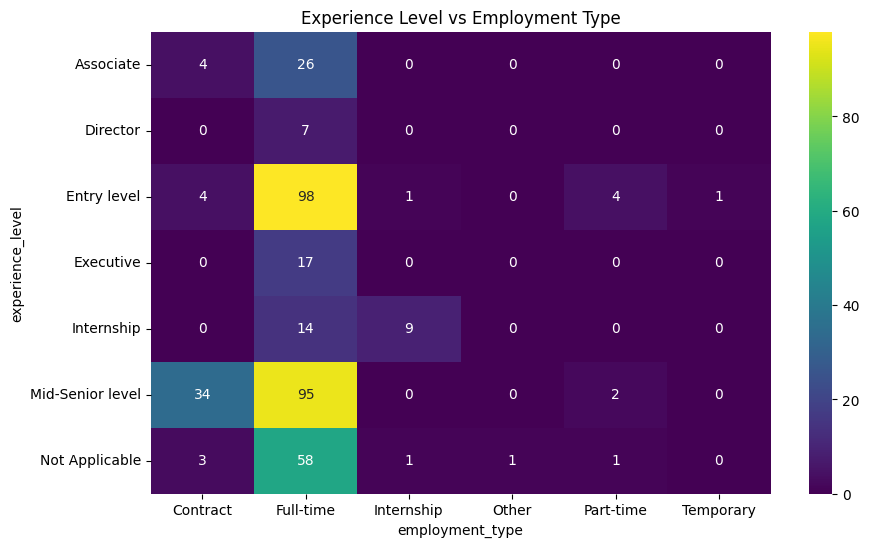

In [ ]:
# Experience Level by Employment Type
print("\nExperience Level vs Employment Type:")
print(pd.crosstab(df['experience_level'], df['employment_type']))

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['experience_level'], df['employment_type']), annot=True, fmt='d', cmap='viridis')
plt.title('Experience Level vs Employment Type')
plt.show()

## 5. Location-Based Job Market Analysis

10. Maps regional job opportunities, vital for job seeker relocation decisions and regional economic planning.

In [ ]:
# Province-Wise Job Distribution - Regional Opportunity Mapping
province_counts = df['province'].value_counts().head(10)
province_percentage = df['province'].value_counts(normalize=True) * 100
print(f"\nProvince-Wise Job Distribution - Regional Opportunities:\n{province_counts}")
print(f"\n   Percentage Distribution:\n{province_percentage}")

import plotly.express as px
import pandas as pd

# Get top 10 provinces by job count
province_counts = df['province'].value_counts().head(10).reset_index()
province_counts.columns = ['Province', 'Count']

# Create horizontal bar chart
fig = px.bar(
    province_counts,
    x='Count',
    y='Province',
    orientation='h',
    color='Province',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text='Count',
    title='Province-Wise Job Distribution - Regional Opportunity Mapping'
)

fig.update_traces(textposition='outside', showlegend=False)
fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    width=1000,
    height=600
)
fig.show()





Province-Wise Job Distribution - Regional Opportunities:
province
Western Province    302
Unspecified          66
Central Province      7
Uva Province          4
Eastern Province      1
Name: count, dtype: int64

   Percentage Distribution:
province
Western Province    79.473684
Unspecified         17.368421
Central Province     1.842105
Uva Province         1.052632
Eastern Province     0.263158
Name: proportion, dtype: float64


## 3. Temporal Job Market Trends

1. Reveals seasonal hiring patterns, optimizing job application and recruitment campaign timing.

In [ ]:
# Convert posted_date to datetime
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year and month
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month

# Group by year and month to count postings
postings_by_month = df.groupby(['year', 'month']).size().reset_index(name='count')

# Optional: format month as 2 digits
postings_by_month['month'] = postings_by_month['month'].apply(lambda x: f'{x:02}')

# Combine year and month for display
postings_by_month['Year-Month'] = postings_by_month['year'].astype(str) + '-' + postings_by_month['month'].astype(str)

# Create table visualization
fig = px.scatter(
    postings_by_month,
    x='Year-Month',
    y='count',
    text='count',
    title='Monthly Job Postings Over the Years'
)

fig.update_traces(mode='text+markers', textposition='top center')
fig.update_layout(xaxis_title='Year-Month', yaxis_title='Number of Job Postings')
fig.show()


## 4. Top Roles, Companies, and Job Functions

1. Directly guides job seekers and students to the most sought-after job roles in the market.

In [ ]:
# Count job categories
job_category_counts = df['job_category'].value_counts().reset_index()
job_category_counts.columns = ['Job Category', 'Count']

# Horizontal bar chart with different pastel colors
fig = px.bar(
    job_category_counts,
    x='Count',
    y='Job Category',
    orientation='h',
    color='Job Category',  # assign different color per category
    color_discrete_sequence=px.colors.qualitative.Pastel,  # pastel color palette
    text='Count',
    title='Number of Job Postings per Category',
)

fig.update_traces(textposition='outside', showlegend=False)  # hide legend
fig.update_layout(yaxis=dict(categoryorder='total ascending'))  # optional: sort by count
fig.show()


2. Identifies major hiring companies, crucial for job seeker targeting and competitive analysis within industries.

In [ ]:
# Get top 10 hiring companies
top_companies = df['company'].value_counts().head(10).reset_index()
top_companies.columns = ['Company', 'Count']

# Create horizontal bar chart
fig = px.bar(
    top_companies,
    x='Count',
    y='Company',
    orientation='h',
    color='Company',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text='Count',
    title='Top Hiring Companies - Key Employers & Competitive Landscape'
)

fig.update_traces(textposition='outside', showlegend=False)
fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    width=1000,
    height=600
)

fig.show()


## 5. Job Description Content & Keyword Analysis

**Import packages for text analysis**

In [ ]:
import nltk
import shutil
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

from nltk.util import ngrams
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1. Identifies core skills and requirements, crucial for job seeker skill development and educational curriculum design.

In [ ]:
# Top Single Word Keywords - Core Skill & Requirement Themes

def extract_keywords_unigram(text, n=20):
    if not isinstance(text, str):
        return Counter()
    words = re.findall(r'\b\w+\b', text.lower())
    nltk.download('stopwords') # download stopwords if not already downloaded
    stop_words_nltk = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words_nltk and len(word) > 2]
    return Counter(words)

all_descriptions_text = ' '.join(df['description'].dropna())
unigram_keywords_counter = extract_keywords_unigram(all_descriptions_text, n=20)
top_unigram_keywords = unigram_keywords_counter.most_common(20)
print(f"\nTop Single Word Keywords - Core Skill Themes:\n{top_unigram_keywords}")

# Top Unigram Keywords
top_unigram_df = pd.DataFrame(top_unigram_keywords, columns=['Keyword', 'Frequency'])

fig_unigram_bar_adv = px.bar(top_unigram_df, x='Keyword', y='Frequency',
                     title='Top 20 Single Word Keywords - Core Skill Themes',
                     labels={'Frequency': 'Keyword Frequency', 'Keyword': 'Keyword'},
                     hover_data=['Frequency', 'Keyword'])
fig_unigram_bar_adv.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top Single Word Keywords - Core Skill Themes:
[('experience', 1128), ('team', 841), ('work', 782), ('development', 654), ('skills', 644), ('data', 553), ('software', 551), ('management', 482), ('project', 436), ('ensure', 432), ('quality', 425), ('communication', 414), ('support', 407), ('solutions', 400), ('strong', 396), ('design', 390), ('security', 375), ('business', 374), ('knowledge', 374), ('teams', 367)]


2. Uncovers key two-word phrases indicating specific skill sets and role descriptions, offering nuanced job market insights.

In [ ]:
# Top Bigram Keywords - Key Skill Phrases & Role Descriptors
def extract_keywords_bigram(text, n=20):
    if not isinstance(text, str):
        return Counter()
    tokens = nltk.word_tokenize(text.lower())
    stop_words_nltk = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words_nltk and word.isalpha()]
    bigrams_list = list(ngrams(tokens, 2))
    bigrams_filtered = [bigram for bigram in bigrams_list if len(' '.join(bigram)) > 4]
    return Counter(bigrams_filtered)

bigram_keywords_counter = extract_keywords_bigram(all_descriptions_text, n=20)
top_bigram_keywords = bigram_keywords_counter.most_common(20)
print(f"\nTop Bigram Keywords - Key Skill Phrases & Role Descriptors:\n{top_bigram_keywords}")

# Top Bigram Keywords
top_bigram_df = pd.DataFrame(top_bigram_keywords, columns=['Bigram', 'Frequency'])
top_bigram_df['Bigram'] = top_bigram_df['Bigram'].astype(str)

fig_bigram_bar_adv = px.bar(top_bigram_df, x='Bigram', y='Frequency',
                     title='Top 20 Bigram Keywords - Key Skill Phrases & Role Descriptors',
                     labels={'Frequency': 'Phrase Frequency', 'Bigram': 'Two-Word Phrase'},
                     hover_data=['Frequency', 'Bigram'])
fig_bigram_bar_adv.show()


Top Bigram Keywords - Key Skill Phrases & Role Descriptors:
[(('years', 'experience'), 166), (('communication', 'skills'), 139), (('computer', 'science'), 129), (('best', 'practices'), 113), (('sri', 'lanka'), 109), (('project', 'management'), 83), (('quality', 'assurance'), 77), (('software', 'development'), 76), (('degree', 'computer'), 74), (('skills', 'ability'), 72), (('join', 'team'), 63), (('software', 'engineering'), 60), (('work', 'environment'), 59), (('make', 'real'), 57), (('status', 'quo'), 55), (('work', 'closely'), 53), (('bachelor', 'degree'), 53), (('team', 'members'), 52), (('change', 'status'), 52), (('related', 'field'), 45)]


3. Reveals common three-word phrases that often represent specific job requirements, qualifications, or contextual role descriptions, providing highly specific job market signals.

In [ ]:
# Top Trigram Keywords - Specific Role Requirements & Context
def extract_keywords_trigram(text, n=20):
    if not isinstance(text, str):
        return Counter()
    tokens = nltk.word_tokenize(text.lower())
    stop_words_nltk = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words_nltk and word.isalpha()]
    trigrams_list = list(ngrams(tokens, 3))
    trigrams_filtered = [trigram for trigram in trigrams_list if len(' '.join(trigram)) > 6]
    return Counter(trigrams_filtered)

trigram_keywords_counter = extract_keywords_trigram(all_descriptions_text, n=20)
top_trigram_keywords = trigram_keywords_counter.most_common(20)
print(f"\nTop Trigram Keywords - Role Requirements & Context:\n{top_trigram_keywords}")

# Top Trigram Keywords
top_trigram_df = pd.DataFrame(top_trigram_keywords, columns=['Trigram', 'Frequency'])
top_trigram_df['Trigram'] = top_trigram_df['Trigram'].astype(str)

fig_trigram_bar_adv = px.bar(top_trigram_df, x='Trigram', y='Frequency',
                     title='Top 20 Trigram Keywords - Role Requirements & Context',
                     labels={'Frequency': 'Phrase Frequency', 'Trigram': 'Three-Word Phrase'},
                     hover_data=['Frequency', 'Trigram'])
fig_trigram_bar_adv.show()


Top Trigram Keywords - Role Requirements & Context:
[(('degree', 'computer', 'science'), 71), (('change', 'status', 'quo'), 52), (('enterprise', 'software', 'solutions'), 30), (('computer', 'science', 'related'), 28), (('get', 'things', 'done'), 28), (('customers', 'partners', 'communities'), 27), (('revenue', 'company', 'employees'), 26), (('company', 'employees', 'continents'), 26), (('employees', 'continents', 'leading'), 26), (('continents', 'leading', 'ai'), 26), (('leading', 'ai', 'technology'), 26), (('ai', 'technology', 'backbone'), 26), (('technology', 'backbone', 'enterprise'), 26), (('backbone', 'enterprise', 'software'), 26), (('software', 'solutions', 'enabling'), 26), (('solutions', 'enabling', 'customers'), 26), (('enabling', 'customers', 'best'), 26), (('customers', 'best', 'really'), 26), (('best', 'really', 'moment'), 26), (('really', 'moment', 'commitment'), 26)]


## 6. Internship Job Analysis

1. Quantifies internship opportunities, indicating trends in entry-level and emerging talent roles.

In [ ]:
# Internship Job Posting Percentage - Emerging Talent Trend
internship_keywords = ['intern', 'internship', 'trainee']
is_internship = df['title'].str.contains('|'.join(internship_keywords), case=False, na=False)
internship_job_percentage = (is_internship.sum() / len(df)) * 100
print(f"\nInternship Job Posting Percentage - Emerging Talent Trend: {internship_job_percentage:.2f}%\n")


Internship Job Posting Percentage - Emerging Talent Trend: 7.11%



2. Highlights industries offering the most internships, guiding students and entry-level job seekers to relevant sectors.

In [ ]:
# Top Industries for Internships - Entry-Level Sector Opportunities
internship_industries = df[df['title'].str.contains('|'.join(internship_keywords), case=False, na=False)]['industries'].value_counts().head(10)
print(f"\nTop 10 Industries for Internships - Entry-Level Sector Opportunities:\n{internship_industries}")


Top 10 Industries for Internships - Entry-Level Sector Opportunities:
industries
Software Development                                                                       11
IT Services and IT Consulting                                                               4
Financial Services                                                                          2
Marketing Services                                                                          2
Software Development, IT System Data Services, and Data Infrastructure and Analytics        1
Manufacturing, Food and Beverage Manufacturing, and Food and Beverage Services              1
Advertising Services                                                                        1
Book and Periodical Publishing, IT Services and IT Consulting, and E-Learning Providers     1
Online Audio and Video Media                                                                1
Veterinary Services                                                     

3. Internship opportunities across industry categories.

In [ ]:
# Count job categories
job_category_counts = df['job_category'].value_counts()

# Create bar chart
fig = px.bar(
    x=job_category_counts.index,
    y=job_category_counts.values,
    labels={'x': 'Job Category', 'y': 'Number of Job Postings'},
    title='Number of Job Postings per Category',
    color=job_category_counts.index,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_xaxes(tickangle=45)
# Add value labels on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

4. Reveals industry-specific employment model preferences, aiding workforce planning and job seeker expectations within sectors.


Industry Employment Type Preference - Sector Models:
employment_type       Contract  Full-time  Internship  Other  Part-time  \
job_category                                                              
cloud_devops                 3          7           0      0          0   
cybersecurity                2         10           1      0          0   
data_science                10         39           0      0          0   
it_support                   2         22           2      0          0   
network_systems              3         75           1      1          3   
project_management           1         36           2      0          0   
qa_testing                   2         32           1      0          0   
software_development        22         69           2      0          4   
technical_writing            0          4           0      0          0   
ui_ux_design                 0         21           2      0          0   

employment_type       Temporary  
job_categor

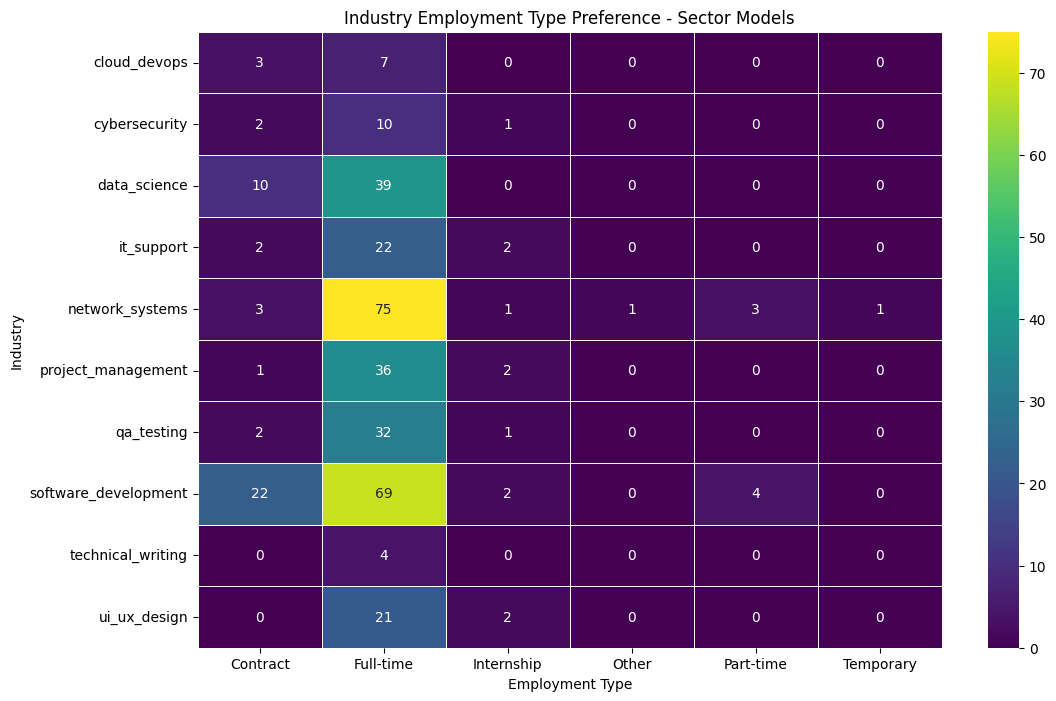

In [ ]:
employment_industry_crosstab = pd.crosstab(df['job_category'], df['employment_type'])
print(f"\nIndustry Employment Type Preference - Sector Models:\n{employment_industry_crosstab.head(10)}")

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(employment_industry_crosstab, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title('Industry Employment Type Preference - Sector Models')
plt.xlabel('Employment Type')
plt.ylabel('Industry')
plt.show()

5. Heatmap for visualizing experience level demand across different industry sectors.


Industry Experience Level Demand - Sector Levels:
experience_level      Associate  Director  Entry level  Executive  Internship  \
job_category                                                                    
cloud_devops                  2         0            2          3           0   
cybersecurity                 2         1            5          0           1   
data_science                  7         0           10          2           6   
it_support                    2         0            6          3           2   
network_systems               4         4           27          1           3   
project_management            4         2            8          1           3   
qa_testing                    2         0            9          4           2   
software_development          5         0           24          3           5   
technical_writing             0         0            0          0           0   
ui_ux_design                  2         0           17    

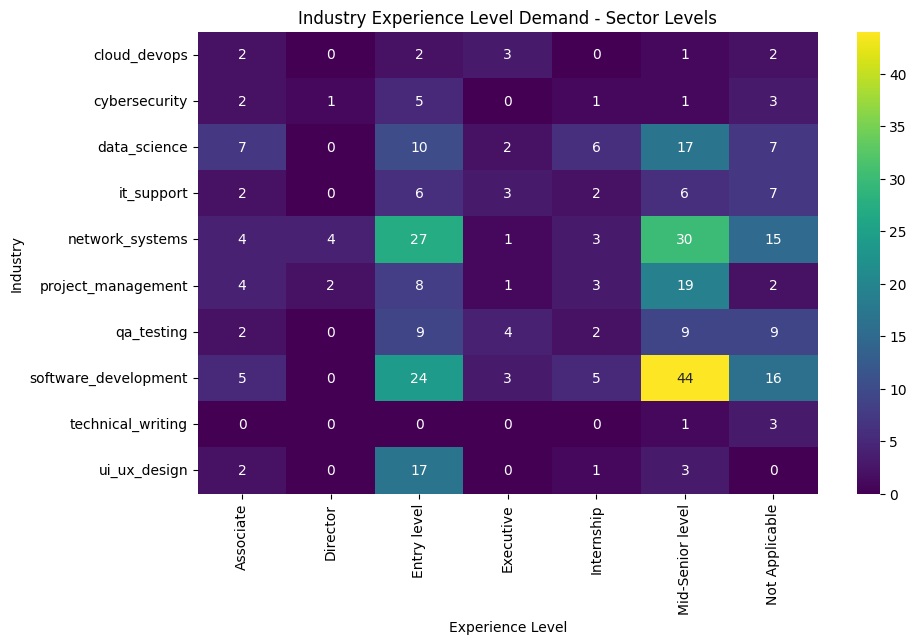

In [ ]:
# Industry Experience Level Demand - Entry-Level vs. Senior Roles per Sector
experience_industry_crosstab = pd.crosstab(df['job_category'], df['experience_level'])
experience_industry_crosstab = experience_industry_crosstab.fillna(0)
print(f"\nIndustry Experience Level Demand - Sector Levels:\n{experience_industry_crosstab}")

plt.figure(figsize=(10, 6))
sns.heatmap(experience_industry_crosstab.fillna(0), annot=True, fmt="d", cmap="viridis")
plt.title('Industry Experience Level Demand - Sector Levels')
plt.xlabel('Experience Level')
plt.ylabel('Industry')
plt.show()

## 7. Deeper Text Analysis: Benefits, Requirements, Sentiment

1. Benchmarks benefit offerings, helping companies refine packages and job seekers evaluate compensation.

In [ ]:
# Prepare the data (already done before this block)
requirement_keywords_categories = {
    'Educational Requirements': ['degree', 'bachelor', 'master', 'phd', 'diploma', 'certification', 'graduate', 'undergraduate', 'qualifications'],
    'Technical Skills': ['python', 'java', 'sql', 'cloud', 'aws', 'azure', 'gcp', 'javascript', 'react', 'angular', 'node.js', '.net', 'c#', 'c++', 'data analysis', 'machine learning', 'cybersecurity', 'networking'],
    'Soft Skills': ['communication skills', 'leadership skills', 'problem-solving', 'teamwork', 'collaboration', 'time management', 'customer service', 'interpersonal skills', 'presentation skills', 'negotiation skills'],
    'Experience Level Required': ['years of experience', 'relevant experience', 'minimum experience', 'proven experience', 'experience in', 'prior experience']
}

requirement_category_counts = {category: 0 for category in requirement_keywords_categories}
for category, keywords in requirement_keywords_categories.items():
    pattern = '|'.join(keywords)
    requirement_category_counts[category] = df['description'].str.contains(pattern, case=False, na=False).sum()

# Sort results
sorted_categories = dict(sorted(requirement_category_counts.items(), key=lambda item: item[1], reverse=True))

# Convert to DataFrame for better control
category_df = pd.DataFrame(sorted_categories.items(), columns=['Category', 'Count'])

# Plot horizontal bar chart
fig = px.bar(
    category_df,
    x='Count',
    y='Category',
    orientation='h',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text='Count',
    title='Requirement Keyword Category Analysis - Skill Gap Identification'
)

fig.update_traces(textposition='outside', showlegend=False)
fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    width=1000,
    height=600
)

fig.show()


2. Breaks down job requirements into categories, highlighting areas of emphasis in job postings and indicating skill gaps that students and job seekers should address, and educators should incorporate into curricula.

In [ ]:
import plotly.graph_objects as go

requirement_keywords_categories = {
    'Educational Requirements': ['degree', 'bachelor', 'master', 'phd', 'diploma', 'certification', 'graduate', 'undergraduate', 'qualifications'],
    'Technical Skills': ['python', 'java', 'sql', 'cloud', 'aws', 'azure', 'gcp', 'javascript', 'react', 'angular', 'node.js', '.net', 'c#', 'c++', 'data analysis', 'machine learning', 'cybersecurity', 'networking'],
    'Soft Skills': ['communication skills', 'leadership skills', 'problem-solving', 'teamwork', 'collaboration', 'time management', 'customer service', 'interpersonal skills', 'presentation skills', 'negotiation skills'],
    'Experience Level Required': ['years of experience', 'relevant experience', 'minimum experience', 'proven experience', 'experience in', 'prior experience']
}
requirement_category_counts = {category: 0 for category in requirement_keywords_categories}
for category, keywords in requirement_keywords_categories.items():
    keyword_pattern = '|'.join(keywords)
    requirement_category_counts[category] = df['description'].str.contains(keyword_pattern, case=False, na=False).sum()
# Sort
sorted_requirement_categories = dict(sorted(requirement_category_counts.items(), key=lambda item: item[1], reverse=True))
# Create the interactive bar chart using Plotly
fig = go.Figure(data=[go.Bar(
    x=list(sorted_requirement_categories.keys()),
    y=list(sorted_requirement_categories.values()),
    marker_color=px.colors.qualitative.Pastel,  # Use a color theme
    text=list(sorted_requirement_categories.values()),
    textposition='auto'
)])
fig.update_layout(
    title="Requirement Keyword Category Analysis - Skill Gap Identification",
    xaxis_title="Requirement Category",
    yaxis_title="Number of Occurrences",
    xaxis={'categoryorder':'total descending'},
    width=1000,  # Adjust width as needed
    height=600  # Adjust height as needed
)
fig.show()

3. Provides a sentiment score for job descriptions, offering a general sense of the overall tone and potentially reflecting market optimism or employer enthusiasm (interpret with caution as sentiment in job descriptions can be nuanced).

In [ ]:
# Sentiment Analysis of Job Descriptions using VADER - Market Tone
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    if isinstance(text, str):
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    return 0

df['description_sentiment_vader'] = df['description'].apply(get_vader_sentiment)

sentiment_stats = df['description_sentiment_vader'].describe()
print(f"\nSentiment Analysis of Job Descriptions (VADER) - Market Tone:\n{sentiment_stats}")


Sentiment Analysis of Job Descriptions (VADER) - Market Tone:
count    380.000000
mean       0.951846
std        0.162856
min       -0.273200
25%        0.978250
50%        0.992850
75%        0.997100
max        0.999700
Name: description_sentiment_vader, dtype: float64


4. Benchmarks industry-specific sentiment in job postings, revealing variations in communication tone across sectors.

In [ ]:
# Sentiment by Industry (Average Sentiment per Industry) - Industry-Specific Tone
industry_sentiment = df.groupby('job_category')['description_sentiment_vader'].mean().sort_values(ascending=False).head(10)
print(f"\nSentiment by Industry - Industry-Specific Tone:\n{industry_sentiment}")


Sentiment by Industry - Industry-Specific Tone:
job_category
cybersecurity           0.992262
technical_writing       0.990325
it_support              0.988785
project_management      0.988705
ui_ux_design            0.986248
cloud_devops            0.986220
qa_testing              0.968569
software_development    0.963893
network_systems         0.931208
data_science            0.865467
Name: description_sentiment_vader, dtype: float64


## 8. Further Deep Dive - Granular Industry and Location Analysis

1. Industry-Specific Skill Demand Analysis


In [ ]:
def analyze_industry_skills(industry, top_n=5):
    """Analyzes top skills for a given industry."""

    # Filter data for the specified industry
    industry_df = df[df['industries'] == industry]

    # Combine relevant text columns (title and description)
    text = ' '.join(industry_df['title'].astype(str) + ' ' + industry_df['description'].astype(str))

    # Tokenization and preprocessing (remove punctuation, lowercase)
    tokens = nltk.word_tokenize(re.sub(r'[^\w\s]', '', text).lower())

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [w for w in tokens if not w in stop_words and len(w) > 2]

    # N-grams (bigrams and trigrams)
    bigrams = list(ngrams(filtered_tokens, 2))
    trigrams = list(ngrams(filtered_tokens, 3))

    # Count frequencies
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)

    # Print the top N bigrams and trigrams
    print(f"\nTop {top_n} Bigrams for {industry}:")
    for bigram, count in bigram_counts.most_common(top_n):
      print(f"{bigram}: {count}")

    print(f"\nTop {top_n} Trigrams for {industry}:")
    for trigram, count in trigram_counts.most_common(top_n):
      print(f"{trigram}: {count}")

# Example usage
top_industries = df['industries'].value_counts().head(5).index
for industry in top_industries:
  print(f"\nSkill analysis for industry: {industry}")
  analyze_industry_skills(industry)



Skill analysis for industry: IT Services and IT Consulting

Top 5 Bigrams for IT Services and IT Consulting:
('years', 'experience'): 58
('computer', 'science'): 48
('best', 'practices'): 37
('communication', 'skills'): 33
('software', 'development'): 31

Top 5 Trigrams for IT Services and IT Consulting:
('degree', 'computer', 'science'): 29
('change', 'status', 'quo'): 14
('great', 'place', 'work'): 12
('written', 'verbal', 'communication'): 11
('minutebefore', 'apply', 'give'): 11

Skill analysis for industry: Software Development

Top 5 Bigrams for Software Development:
('status', 'quo'): 41
('make', 'real'): 38
('change', 'status'): 38
('best', 'practices'): 30
('computer', 'science'): 28

Top 5 Trigrams for Software Development:
('change', 'status', 'quo'): 38
('enterprise', 'software', 'solutions'): 21
('billiondollar', 'revenue', 'company'): 19
('employees', 'continents', 'leading'): 19
('continents', 'leading', 'technology'): 19

Skill analysis for industry: Technology, Inform

2. Company-Level Hiring Trends: For the top hiring companies, analyze their job posting patterns over time, the types of roles they are frequently hiring for, and the skills they emphasize.


In [ ]:
# Company-Level Hiring Trends Analysis
def analyze_company_hiring(company, top_n=10):
    """Analyzes hiring trends for a specific company."""
    company_df = df[df['company'] == company]

    if company_df.empty:
        print(f"No data found for company: {company}")
        return

    # Analyze top job titles
    top_job_titles = company_df['title'].value_counts().head(top_n)
    print(f"\nTop {top_n} Job Titles at {company}:\n{top_job_titles}")

    # Analyze top skills
    text = ' '.join(company_df['title'].astype(str) + ' ' + company_df['description'].astype(str))
    tokens = nltk.word_tokenize(re.sub(r'[^\w\s]', '', text).lower())
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [w for w in tokens if not w in stop_words and len(w) > 2]
    skill_counts = Counter(filtered_tokens)
    top_skills = skill_counts.most_common(top_n)
    print(f"\nTop {top_n} Skills required at {company}:\n{top_skills}")


# Analyze top 5 companies
top_companies = df['company'].value_counts().head(5).index
for company in top_companies:
    print(f"\nCompany Hiring Trend Analysis for: {company}")
    analyze_company_hiring(company)



Company Hiring Trend Analysis for: IFS

Top 10 Job Titles at IFS:
title
Undergraduate Trainee (R&D AI Engineering)                                                          2
PMO Specialist                                                                                      2
Snr Program Manager                                                                                 1
SaaS Operations Analyst ( Portfolio Company)                                                        1
Technical Customer Support Specialist ( Portfolio Company)                                          1
Director - Partner Operations (IGT1 Lanka - Sitecore)                                               1
Program Manager/Senior Program Manager                                                              1
Undergraduate Trainee Software Engineering - Infrastructure & Platform Delivery (IFS Technology)    1
Customer Support Specialist (IFS Portfolio Companies)                                               1
Data Scie

3. Job Function Specialization by Province: Explore if certain job functions are more concentrated in specific provinces, indicating regional job market specializations.


In [ ]:
# Job Function Specialization by Province

def analyze_job_function_by_province(df, top_n_provinces=5, top_n_functions=10):
    """
    Analyzes the concentration of job functions within the top provinces.
    """

    # 1. Identify top provinces
    top_provinces = df['province'].value_counts().nlargest(top_n_provinces).index

    # 2. Loop through each province
    for province in top_provinces:
        province_df = df[df['province'] == province]

        # 3. Analyze job functions
        if not province_df.empty:
          job_function_counts = province_df['job_function'].value_counts().nlargest(top_n_functions)
          print(f"\nTop {top_n_functions} Job Functions in {province}:")
          print(job_function_counts)
        else:
          print(f"No data found for {province}")

# Example usage
analyze_job_function_by_province(df)



Top 10 Job Functions in Western Province:
job_function
Engineering and Information Technology              82
Information Technology                              64
Quality Assurance                                   20
Design, Art/Creative, and Information Technology    20
Project Management and Information Technology       15
Other                                                9
Administrative                                       7
Sales and Business Development                       7
Management and Manufacturing                         7
Project Management                                   6
Name: count, dtype: int64

Top 10 Job Functions in Unspecified:
job_function
Engineering and Information Technology              40
Information Technology                              12
Other                                                3
Engineering                                          2
Sales                                                2
Design, Art/Creative, and Information Tech

4. This analysis identifies the most in-demand job roles by examining job postings that remained available from 2024 into 2025.  If a job is still open from 2024, it suggests a specialize skill gap in the Sri Lankan professional job market,  
indicating either a shortage of qualified candidates or an increasing demand for those roles.

In [ ]:
# Filter data for the year 2024
df_2024 = df[df['posted_date'].dt.year == 2024]

# Group by job category and count occurrences, then sort
job_category_counts_2024 = df_2024.groupby('job_category')['title'].count().sort_values(ascending=False)

# Create an interactive bar chart using Plotly
fig = go.Figure(data=[go.Bar(
    x=job_category_counts_2024.index,
    y=job_category_counts_2024.values,
    marker_color=px.colors.qualitative.Pastel, # Use a color theme
    text=job_category_counts_2024.values,
    textposition='auto'
)])

fig.update_layout(
    title="Total Job Titles by Job Category in 2024",
    xaxis_title="Job Category",
    yaxis_title="Count of Job Titles",
    xaxis={'categoryorder':'total descending'},
    width=1000,  # Adjust width as needed
    height=600  # Adjust height as needed

)

fig.show()


5. Word Cloud for Job Titles

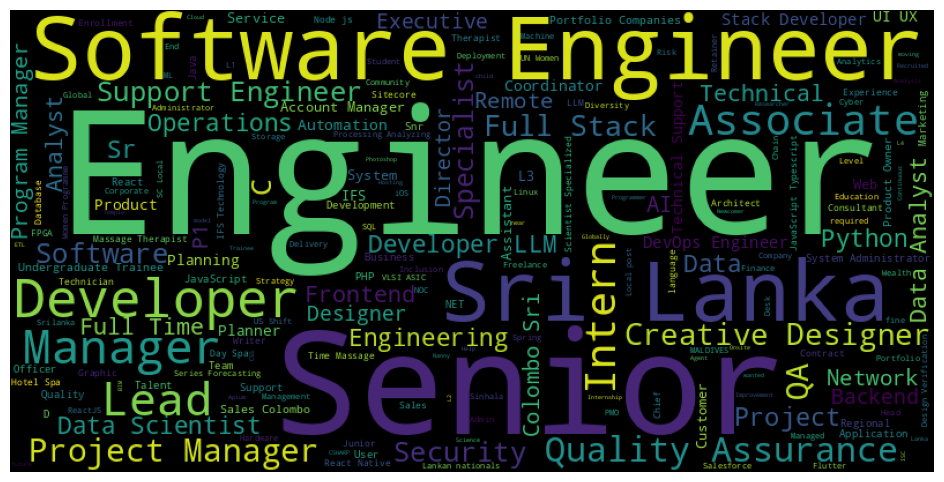

In [ ]:
# Word Cloud for Job Titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

titles_text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(titles_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This Jupyter Notebook provides a robust framework for analyzing the Sri Lankan LinkedIn job market. The actionable insights generated are valuable for diverse stakeholders.



---
**End of Analysis Notebook**